# [Titanic](https://www.kaggle.com/c/titanic)- Who will survive?

- PassengerId: unique identifier of a passenger
- Pclass: Ticket class (1= 1st class, and so on)
- Name: Name of the passenger
- Sex: Male or female
- Age: Age in years
- SibSp: # of siblings
- Parch: # of parents
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of embarkation (where did they get onbaord)
            C = cherbourg, Q = Queenstown, S= Southampton
- Target class: Survived: 0/1 survived or no survival
***

1. Explore the features 
2. Apply feature engineering
3. Build models using code in src/
4. Evaluate the models
5. Interpret the results
6. Answer some questions

In [94]:
import pandas as pd # for loading and performing analysis on the dataset
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# for dealing with categorical variables 
from sklearn.preprocessing import LabelEncoder 

In [54]:
titanic_dataset_train = pd.read_csv('../input/train.csv', delimiter=',')

In [3]:
titanic_dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
titanic_dataset_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic_dataset_train.shape

(891, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ec5bcd0f0>,
      dtype=object)

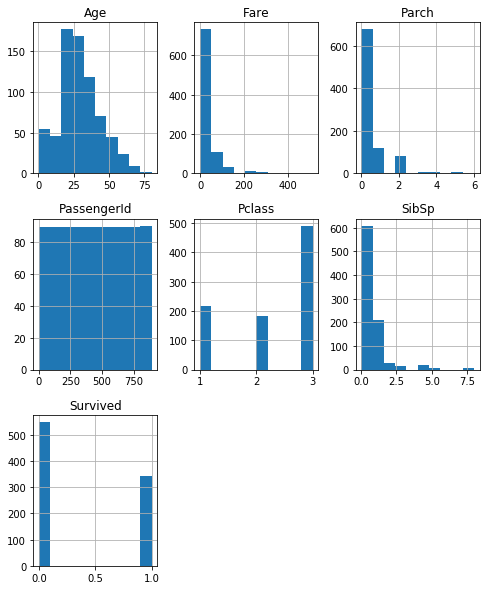

In [5]:
titanic_dataset_train.hist(figsize=(8,10))

In [17]:
print(titanic_dataset_train.groupby('Survived').groups)

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
            ...
            877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
           dtype='int64', length=549), 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
            ...
            865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
           dtype='int64', length=342)}


**How many people survived from each class**

/home/deb/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/deb/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


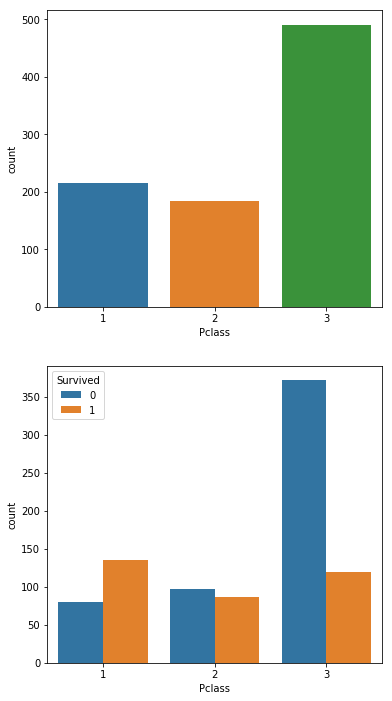

In [27]:
# TELLS US HOW MANY PASSENGERS SURVIVED FROM EACH CLASS
plt.figure(figsize=[6,12])
plt.subplot(211)          # PARAMETER: 211 INDICATES 2 ROWS, 1 COLUMN, 1ST PLOT
sns.countplot(x='Pclass',data=titanic_dataset_train)
plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived',
              data=titanic_dataset_train)

**We see that a lot of people from class 3 did not survive and a majority of people from 1st,2nd class survived**

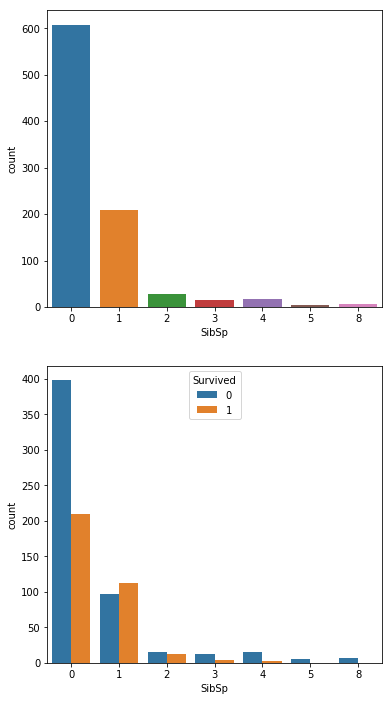

In [30]:
plt.figure(figsize=[6,12])
plt.subplot(211)          # PARAMETER: 211 INDICATES 2 ROWS, 1 COLUMN, 1ST PLOT
sns.countplot(x='SibSp',data=titanic_dataset_train)
plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived',
              data=titanic_dataset_train)

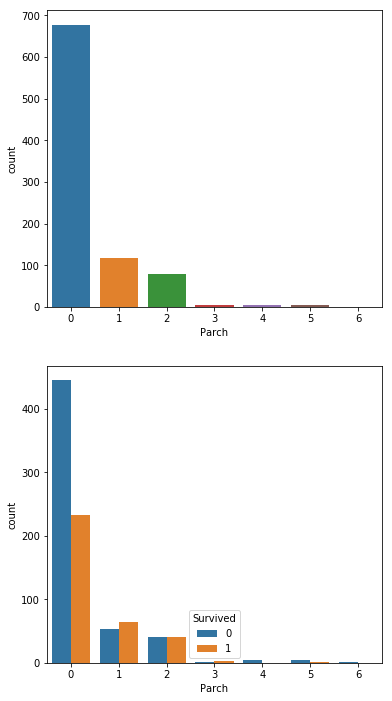

In [31]:
plt.figure(figsize=[6,12])
plt.subplot(211)          # PARAMETER: 211 INDICATES 2 ROWS, 1 COLUMN, 1ST PLOT
sns.countplot(x='Parch',data=titanic_dataset_train)
plt.subplot(212)
sns.countplot(x='Parch',hue='Survived',
              data=titanic_dataset_train)

**If you have parents, chances of survival is more**

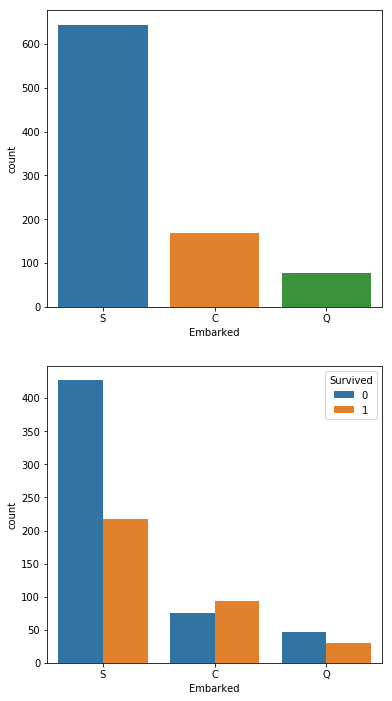

In [32]:
plt.figure(figsize=[6,12])
plt.subplot(211)          # PARAMETER: 211 INDICATES 2 ROWS, 1 COLUMN, 1ST PLOT
sns.countplot(x='Embarked',data=titanic_dataset_train)
plt.subplot(212)
sns.countplot(x='Embarked',hue='Survived',
              data=titanic_dataset_train)

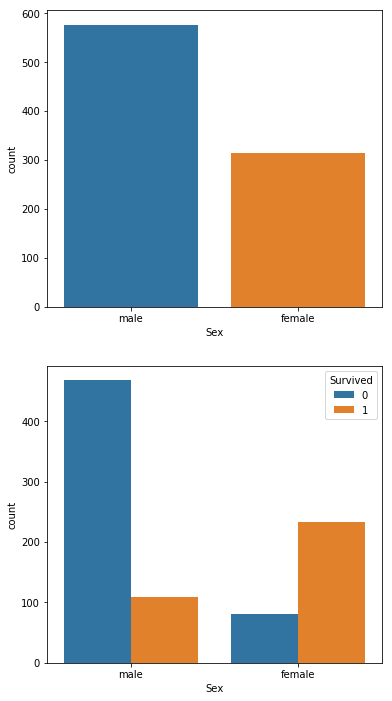

In [34]:
plt.figure(figsize=[6,12])
plt.subplot(211)          # PARAMETER: 211 INDICATES 2 ROWS, 1 COLUMN, 1ST PLOT
sns.countplot(x='Sex',data=titanic_dataset_train)
plt.subplot(212)
sns.countplot(x='Sex',hue='Survived',
              data=titanic_dataset_train)

**Higher chances of female to survive is more than men. Which makes sense, as it is based on survival instinct**

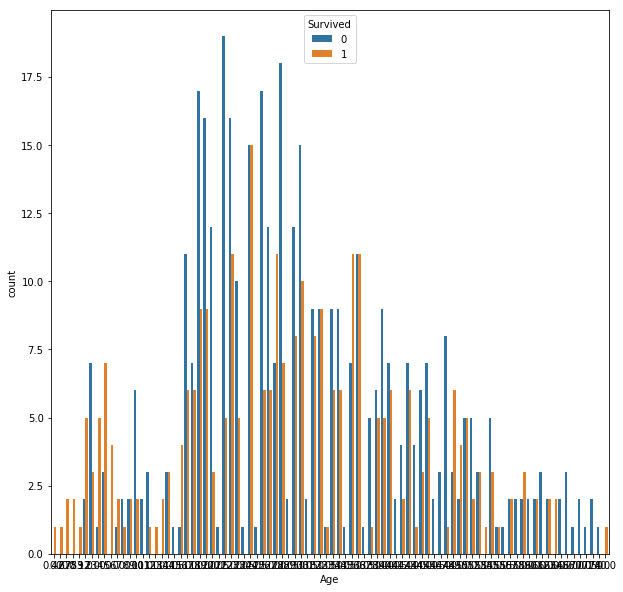

In [35]:
plt.figure(figsize=[10,10])
sns.countplot(x='Age',hue='Survived',
              data=titanic_dataset_train)

**Might be a good idea to bin these ages and put them into age groups**

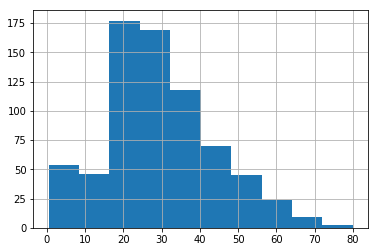

In [37]:
titanic_dataset_train['Age'].hist(bins=10)

**Majority passengers are in the age group of 20-30**

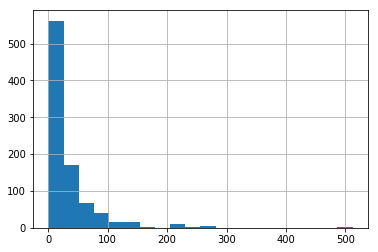

In [39]:
titanic_dataset_train['Fare'].hist(bins=20)

### Below we will do some basic feature engineering and use that to build our baseline model
***

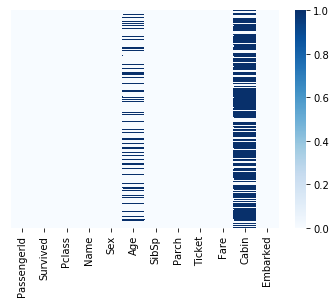

In [57]:
# CHECK FOR MISSING VALUES
sns.heatmap(titanic_dataset_train.isnull(),
            yticklabels=False, cmap='Blues')

**We see that features Cabin and Age have missing values. Out of these two features, we see cabin has a lot more missing values. It might be a good idea to remove it.**

In [134]:
# POINT TO NOTE: param: inplace-True means the
# values will be dropped in the instance of the
# dataframe itself. Set it to False if you don't want
# the dataset to change.
clean_titanic_train_set = titanic_dataset_train.drop('Cabin',
                                axis=1,inplace=False)

* Also, for the baseline model we will not be considering the following features
1. Passenger id: this unique identifier will not contribute much towards the survival of the passenger
2. Embarked: This feature might be considered in the later model
3. Ticket: Ticket number will not be considered here. Although it might be of significance later on.
4. Name: This might be of significance later on. But now now.

In [135]:
clean_titanic_train_set.drop(['PassengerId','Embarked','Ticket',
                             'Name'],
                                axis=1,inplace=True)

In [136]:
clean_titanic_train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


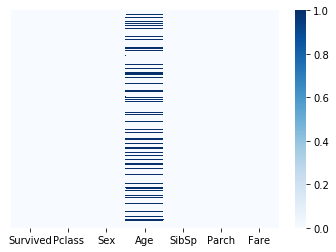

In [137]:
sns.heatmap(clean_titanic_train_set.isnull(),
            yticklabels=False, cmap='Blues')

**Still need to deal with the Age column. It is an important feature, will have to apply data imputation.**

/home/deb/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


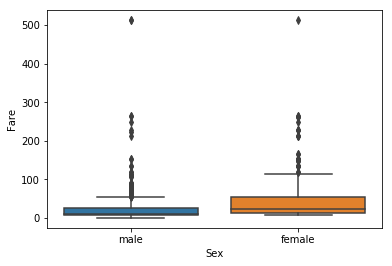

In [138]:
sns.boxplot(x='Sex',y='Fare',data=clean_titanic_train_set)

In [105]:
# DEFINING A FUNCTION TO IMPUTE AGE AS THE MEAN 
# BASED ON THE SEX OF THE PASSENGER
def fill_age(data):
    # PASS A TUPLE, OF (AGE,SEX)
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

In [106]:
clean_titanic_train_set['Age'] = clean_titanic_train_set[
                    ['Age','Sex']].apply(fill_age, axis=1)

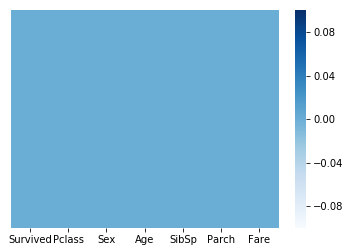

In [107]:
sns.heatmap(clean_titanic_train_set.isnull(), cmap='Blues',
           yticklabels=False)

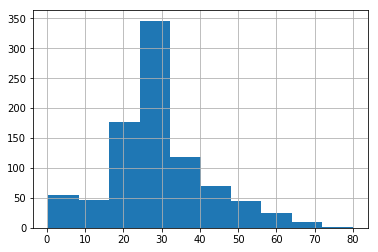

In [110]:
clean_titanic_train_set['Age'].hist()
# THE AGE GROUP 25-30 SEEMS TO BE DOMINATING
# WE WILL TRY TO IMPROVE THIS OVER BASELINE MODEL

**Still need to deal with Age column. Since it is nominal variable, we will apply label encoding**

In [96]:
le = LabelEncoder()
sex_labels = le.fit_transform(clean_titanic_train_set['Sex'])
clean_titanic_train_set['Sex_encoded'] = sex_labels

In [111]:
clean_titanic_train_set.drop('Sex',axis=1,inplace=True)

In [112]:
clean_titanic_train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [124]:
X_train_titanic = clean_titanic_train_set.drop('Survived', 
                                axis=1,inplace=False)
y_train_titanic = clean_titanic_train_set['Survived']

**So we have the dataset for our baseline model eady. Although we need to do the same for our test set as well. This will ensure a fair evaluation of the model.**
* To do so, we will prepare a script and re-use this code.
* Scripts are ready for training the model.
* The test set obtained from kaggle does not have the labels.
* We will pause our work on this project for now.